#HW #1. Improve code Efficiency: Sort First!

## Scenario.

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs.

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.)

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**NOTE: Do not include runtimes for graphing**

**TOTAL POINTS: 100**

---

In [53]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax
import time

Answer Question #1 in the comments of the code chunk below.

In [54]:
def computeAllTPRs(true_label, confs):
  '''

  inputs:
    - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
    - confs: list of confidences

  This method computes the True Positive Rate (TPRs) and FPRs for all relevant
  thresholds given true_label and confs. Relevant thresholds are considered
  all different values found in confs.
  '''

  # Define / initialize  variables
  sentinelValue = -1 # O(1)
  totalPositives = sum(true_label) # O(1)
  totalNegatives = len(true_label) - totalPositives # O(1)
  truePositives = 0 # O(1)
  falsePositives = 0 # O(1)
  truePositiveRate = [] # O(1)
  falsePositiveRate = [] # O(1)

  for i in range(len(confs)): # O(n)
    maxVal = max(confs)  # O(n)
    argMax = argmax(confs) # O(n)
    confs[argMax] = sentinelValue # O(1)
    if true_label[argMax]==1: # O(1)
      truePositives += 1 # O(1)
    else: 
      falsePositives += 1 # O(1)

    truePositiveRate.append(truePositives/totalPositives) # O(1)
    falsePositiveRate.append(falsePositives/totalNegatives) # O(1)

# T(n) = 7 + n(n + n + 5) = 2n^2 + 5n + 7

Below, provide your implementation for Question #2.

In [55]:
def computeAllTPRs_improved(true_label, confs):

  totalPositives = sum(true_label) # O(1)
  totalNegatives = len(true_label) - totalPositives # O(1)
  truePositives = 0 # O(1)
  falsePositives = 0 # O(1)
  truePositiveRate = [] # O(1)
  falsePositiveRate = [] # O(1)

  # Sort confidences in descending order, zipped with corresponding labels 
  sorted_confs = sorted(zip(confs, true_label), reverse=True, key = lambda x: x[0]) # O(nlogn)

  for conf, label in sorted_confs: # O(n)
    if label == 1: # O(1)
      truePositives += 1 # O(1)
    else: 
      falsePositives += 1 # O(1)

    truePositiveRate.append(truePositives/totalPositives) # O(1)
    falsePositiveRate.append(falsePositives/totalNegatives) # O(1)

# T(n) = 6 + nlogn + n(5) = nlogn + 5n + 6

Question #3. Below, provide your code which records and plots the runtime for the original and improved methods.

In the first method, our time complexity is O(n^2), whereas the improved method has a time complexity of O(nlogn). Based on this, we can expect the second method to perform better than the first, as it is a lower computational complexity class. 

In [56]:
def testComputeAllTPRs(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5:
      lab = 1
    else:
      lab = 0
    labels.append(lab)

  start = time.time()
  computeAllTPRs(labels, deepcopy(confList))
  end = time.time()

  return (end-start) * 10**3 # runtime in milliseconds

def testComputeAllTPRs_improved(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5:
      lab = 1
    else:
      lab = 0
    labels.append(lab)
  
  start = time.time()
  computeAllTPRs_improved(labels, deepcopy(confList))
  end = time.time()

  return (end-start) * 10**3 # runtime in milliseconds

In [59]:
numsamples = list(range(100, 1000, 100))
runtimes1 = []
runtimes2 = []

for n in numsamples:
    runtimes1.append(testComputeAllTPRs(n))
    runtimes2.append(testComputeAllTPRs_improved(n))

print(runtimes1)
print(runtimes2)

[2.246856689453125, 4.945039749145508, 7.694244384765625, 12.308120727539062, 14.941215515136719, 18.435239791870117, 23.82493019104004, 33.483028411865234, 37.285804748535156]
[0.11086463928222656, 0.22864341735839844, 0.20813941955566406, 0.25391578674316406, 0.25081634521484375, 0.2911090850830078, 0.3371238708496094, 0.37097930908203125, 0.37026405334472656]


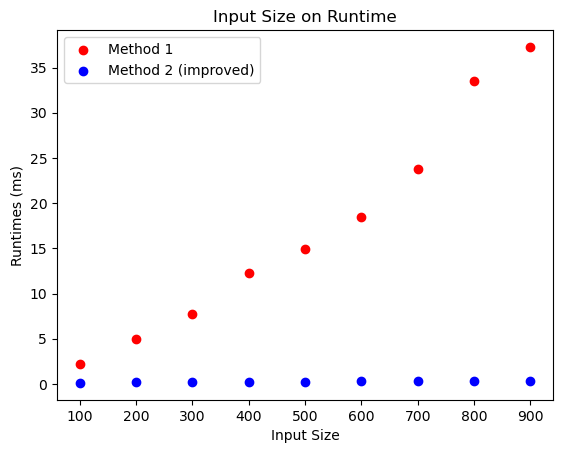

In [62]:
plt.scatter(x=numsamples, y=runtimes1, color = "red")
plt.scatter(x=numsamples, y=runtimes2, color = "blue")
plt.xlabel("Input Size")
plt.ylabel("Runtimes (ms)")
plt.title("Input Size on Runtime")
plt.legend(["Method 1", "Method 2 (improved)"])